# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [82]:
(app_train[['DAYS_BIRTH']]/365).describe()

,DAYS_BIRTH
count,307511.000000
mean,43.936973
std,11.956133
min,20.517808
25%,34.008219
50%,43.150685
75%,53.923288
max,69.120548


In [9]:
bin_cut = np.linspace(20,70,11)
app_train['DAYS_BIRTH_G'] = pd.cut(app_train['DAYS_BIRTH']/365, bins=bin_cut)
app_train["DAYS_BIRTH_G"].value_counts().sort_index()

(20.0, 25.0]    12159
(25.0, 30.0]    32862
(30.0, 35.0]    39440
(35.0, 40.0]    42868
(40.0, 45.0]    41406
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(60.0, 65.0]    27476
(65.0, 70.0]     8103
Name: DAYS_BIRTH_G, dtype: int64

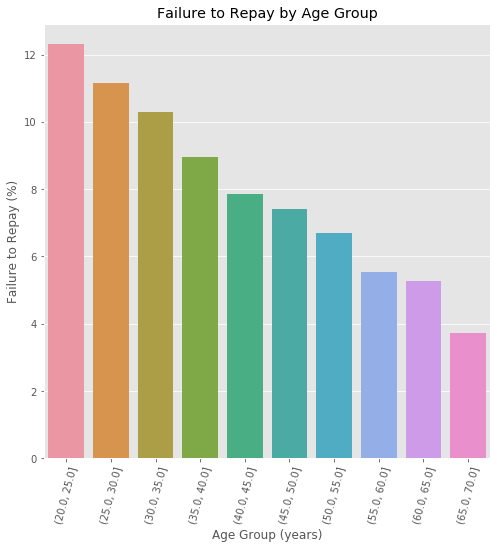

In [71]:
# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
import seaborn as sns # 另一個繪圖-樣式套件

plt.style.use('ggplot')
plt.figure(figsize = (8, 8))

BITTH_group = app_train.groupby("DAYS_BIRTH_G")[["TARGET"]].mean()

px = BITTH_group.index
py = BITTH_group.TARGET * 100
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [81]:
app_train[["AMT_INCOME_TOTAL"]].describe()

,AMT_INCOME_TOTAL
count,3.075110e+05
mean,1.687979e+05
std,2.371231e+05
min,2.565000e+04
25%,1.125000e+05
50%,1.471500e+05
75%,2.025000e+05
max,1.170000e+08


In [102]:
app_train["AMT_INCOME_TOTAL_BIN"] = pd.qcut(app_train['AMT_INCOME_TOTAL']/1000, 11, precision=1)
app_train["AMT_INCOME_TOTAL_BIN"].value_counts().sort_index()

(25.5, 81.0]         33391
(81.0, 90.0]         24531
(90.0, 112.5]        42656
(112.5, 126.0]       11507
(126.0, 135.0]       37342
(135.0, 157.5]       33628
(157.5, 180.0]       32529
(180.0, 202.5]       20389
(202.5, 225.0]       24420
(225.0, 270.0]       19957
(270.0, 117000.0]    27161
Name: AMT_INCOME_TOTAL_BIN, dtype: int64

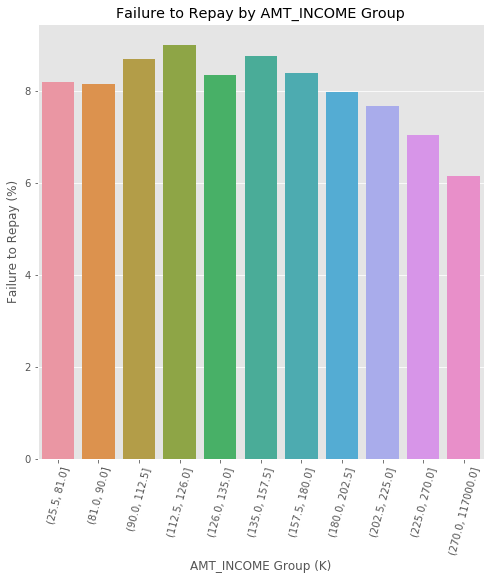

In [103]:
plt.figure(figsize = (8, 8))

INCOME_group = app_train.groupby("AMT_INCOME_TOTAL_BIN")[["TARGET"]].mean()

px = INCOME_group.index
py = INCOME_group.TARGET * 100
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('AMT_INCOME Group (K)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by AMT_INCOME Group');

In [80]:
app_train[["AMT_CREDIT"]].describe()

,AMT_CREDIT
count,3.075110e+05
mean,5.990260e+05
std,4.024908e+05
min,4.500000e+04
25%,2.700000e+05
50%,5.135310e+05
75%,8.086500e+05
max,4.050000e+06


In [104]:
app_train["AMT_CREDIT_BIN"] = pd.qcut(app_train['AMT_CREDIT']/1000, 11, precision=1)
app_train["AMT_CREDIT_BIN"].value_counts().sort_index()

(44.9, 180.0]       33204
(180.0, 247.3]      23565
(247.3, 284.4]      28837
(284.4, 365.2]      26228
(365.2, 468.0]      28021
(468.0, 545.0]      31366
(545.0, 675.0]      32709
(675.0, 781.9]      20667
(781.9, 942.3]      28372
(942.3, 1195.5]     26590
(1195.5, 4050.0]    27952
Name: AMT_CREDIT_BIN, dtype: int64

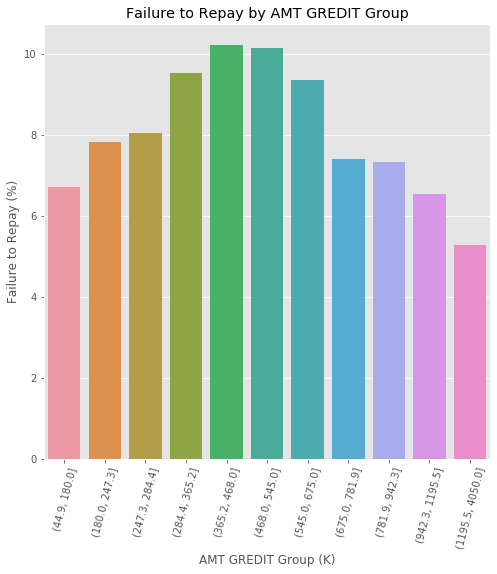

In [105]:
plt.figure(figsize = (8, 8))

CREDIT_group = app_train.groupby("AMT_CREDIT_BIN")[["TARGET"]].mean()

px = CREDIT_group.index
py = CREDIT_group.TARGET * 100
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('AMT GREDIT Group (K)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by AMT GREDIT Group');